<a href="https://colab.research.google.com/github/Rikupro-creator/Plotting-/blob/main/scatterplot_and_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If we want to inspect the relationship between two numeric variables, the standard choice of plot is the scatterplot. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io


%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fuel-econ.csv to fuel-econ (1).csv


In [ ]:
fuel=pd.read_csv(io.BytesIO(uploaded['fuel-econ (1).csv']))
fuel.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


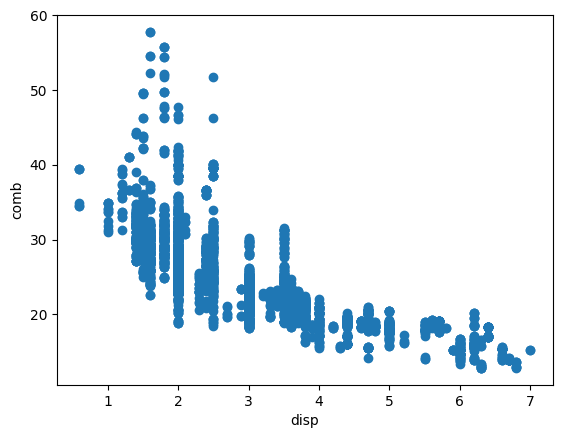

In [ ]:
plt.scatter(fuel['displ'], fuel['comb']);
plt.xlabel('disp')
plt.ylabel('comb');

# using seaborn to plot a scatterplot

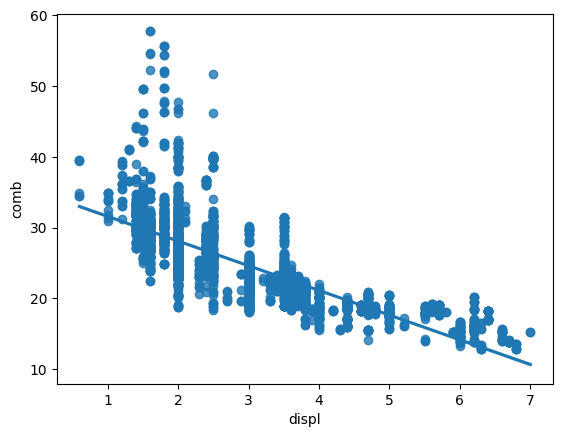

In [ ]:
sns.regplot(data=fuel, x='displ', y='comb')
plt.xlabel('displ')
plt.ylabel('comb');

The plot above shows the presence of a regression plot. We can remove it using the code below

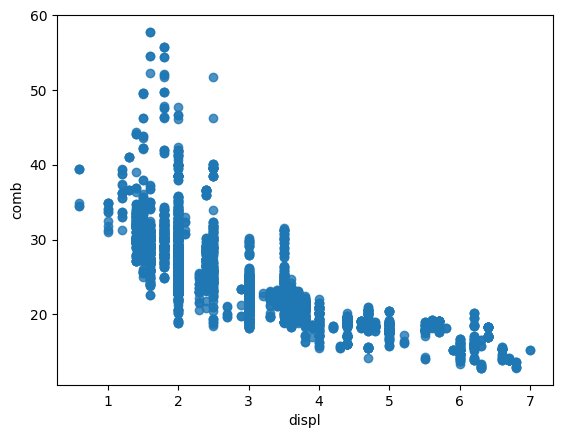

In [ ]:
sns.regplot(data=fuel, x='displ', y='comb', fit_reg=False )
plt.xlabel('displ')
plt.ylabel('comb');

# Violin plots

We are using seaborn to plot violin plots to get information about the distribution of the data points. We can say that they are like histogram but show where the distributions are

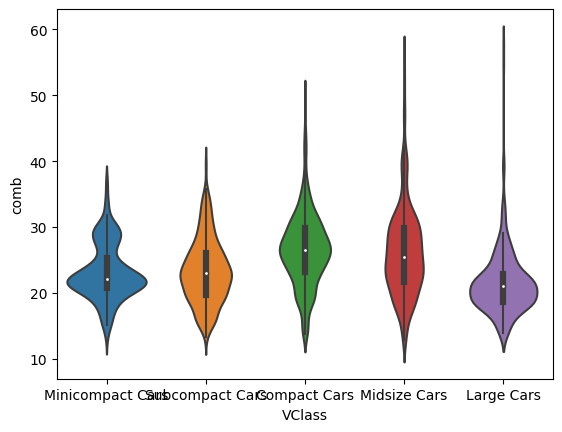

In [ ]:
sedan_classes=['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

vclasses=pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

fuel['VClass']=fuel['VClass'].astype(vclasses);
sns.violinplot(data=fuel, x='VClass', y='comb');

lets start with the modification of the plot

lets make it of equal color, and change the labels of the x-axis


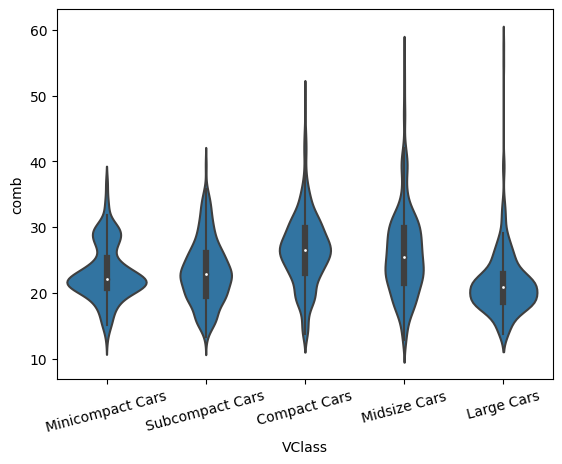

In [ ]:
sns.violinplot(data=fuel, x='VClass', y='comb', color=sns.color_palette()[0])
plt.xticks(rotation=15);

Lets remove the boxplots at the middle

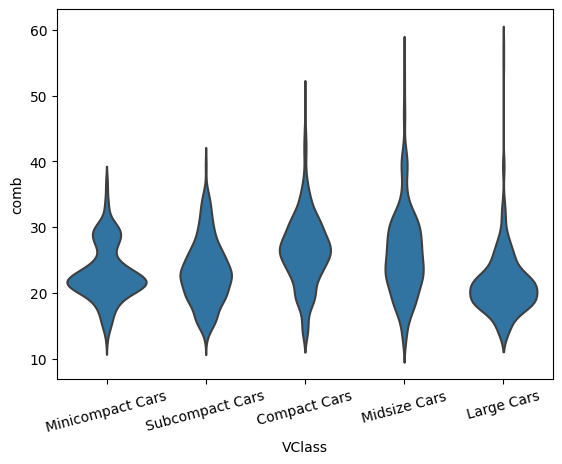

In [ ]:
sns.violinplot(data=fuel, x='VClass', y='comb', color=sns.color_palette()[0], inner=None)
plt.xticks(rotation=15);

Lets make it horizontal instead of vartical.
we only  interchange the y and x values

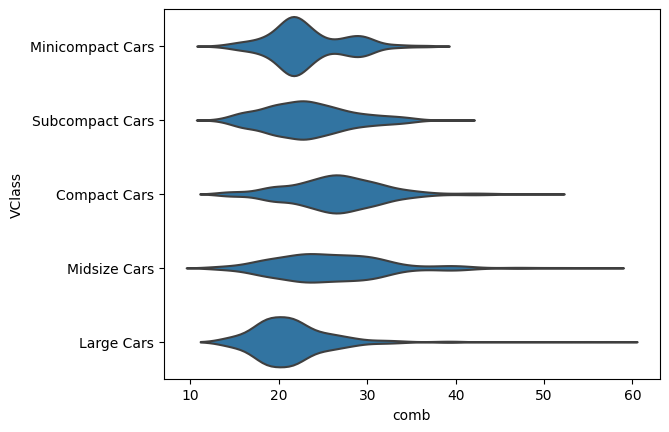

In [ ]:
sns.violinplot(data=fuel, x='comb',y='VClass', color=sns.color_palette()[0], inner=None);

# Box plots
we shall see how violin plots compare to boxplots. We shall see also the alternatives of the inner argument of the violinplot in  seaborn

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Minicompact Cars'),
  Text(1, 0, 'Subcompact Cars'),
  Text(2, 0, 'Compact Cars'),
  Text(3, 0, 'Midsize Cars'),
  Text(4, 0, 'Large Cars')])

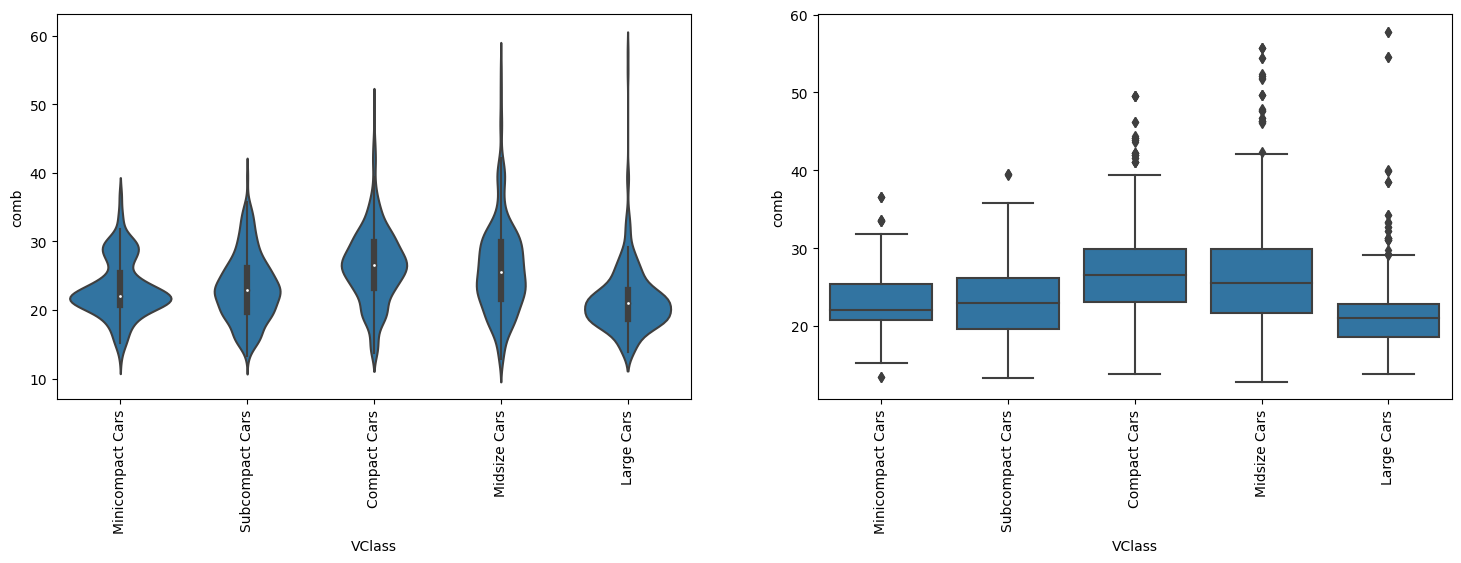

In [ ]:
plt.figure(figsize=[18,5])

plt.subplot(1,2,1)
sns.violinplot(data=fuel, x='VClass', y='comb', color=sns.color_palette()[0]);
plt.xticks(rotation=90);

plt.subplot(1,2,2)
sns.boxplot(data=fuel, x='VClass', y='comb', color=sns.color_palette()[0])
plt.xticks(rotation=90)

# note that the inner boxplots  in a violin plot are similar to those  of the boxplotted side by side.

Lets plot a horizontal boxplot

<Axes: xlabel='comb', ylabel='VClass'>

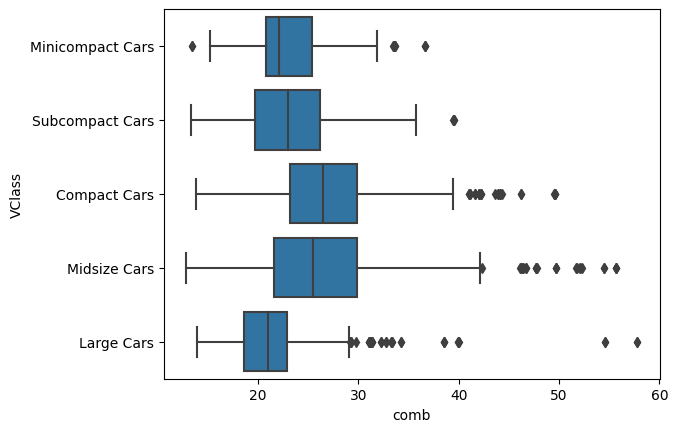

In [ ]:
sns.boxplot(data=fuel, y='VClass', x='comb', color=sns.color_palette()[0])

# violin plots with quartile information


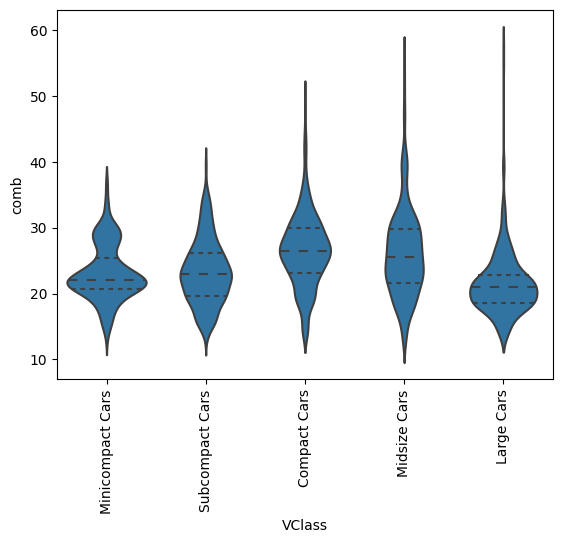

In [ ]:
sns.violinplot(data=fuel, x='VClass',y='comb', color=sns.color_palette()[0],inner='quartile')
plt.xticks(rotation=90);

# clustered bar charts

To depict the relationship between two categorical variables, we can extend the univariate bar chart seen in the previous lesson into a clustered bar chart. Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an order that makes the plot easy to interpret. In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster. This is easiest to see with an example, using seaborn's countplot function. To take the plot from univariate to bivariate, we add the second variable to be plotted under the "hue" argument:

In [ ]:
# lets modify the data a little bit
fuel['trans_type']=fuel['trans'].apply(lambda X:X.split()[0])

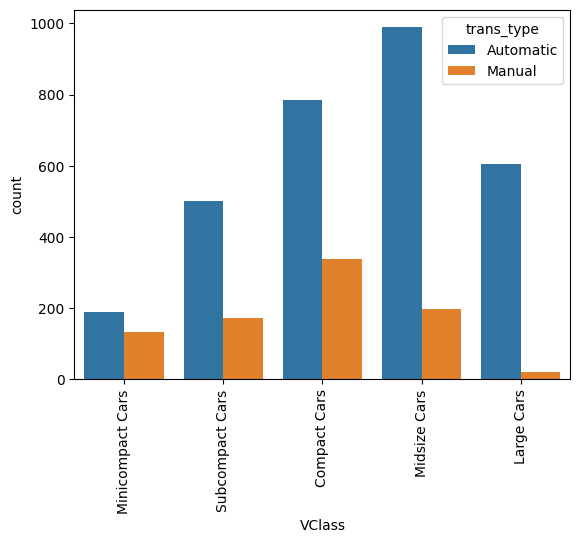

In [ ]:
sns.countplot(data=fuel, x='VClass', hue='trans_type')
plt.xticks(rotation=90);

# more  on heatmaps

In [ ]:
cts_counts=fuel.groupby(['VClass', 'trans_type']).size()
cts_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [ ]:
cts_counts=cts_counts.reset_index(name='count')

In [ ]:
cts_counts=cts_counts.pivot(index='VClass', columns='trans_type', values='count')

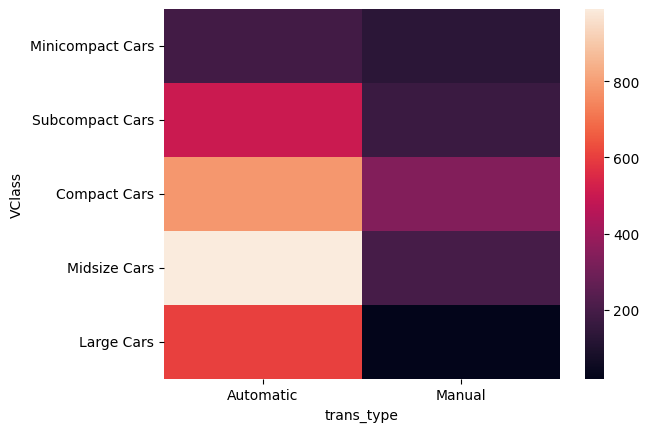

In [ ]:
sns.heatmap(cts_counts);

<Axes: xlabel='trans_type', ylabel='VClass'>

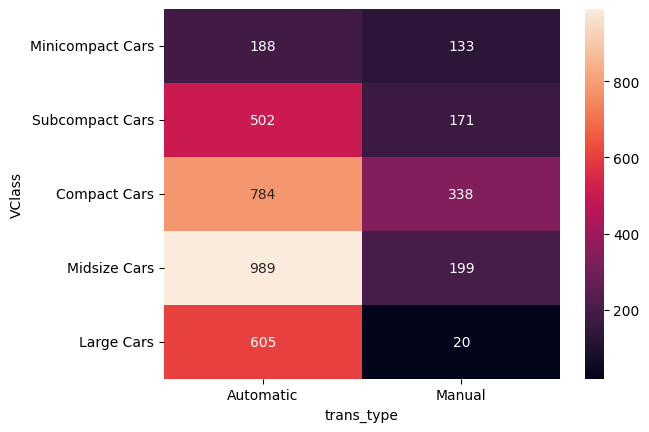

In [ ]:
sns.heatmap(cts_counts, annot=True, fmt='d')

# faceting

One general visualization technique that will be useful for you to know about to handle plots of two or more variables is faceting. In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall. While faceting is most useful in multivariate visualization, it is still valuable to introduce the technique here in our discussion of bivariate plots.

For example, rather than depicting the relationship between one numeric variable and one categorical variable using a violin plot or box plot, we could use faceting to look at a histogram of the numeric variable for subsets of the data divided by categorical variable levels. Seaborn's FacetGrid class facilitates the creation of faceted plots. There are two steps involved in creating a faceted plot. First, we need to create an instance of the FacetGrid object and specify the feature we want to facet by (vehicle class, "VClass" in our example). Then we use the map method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, the histogram on combined fuel efficiency "comb").

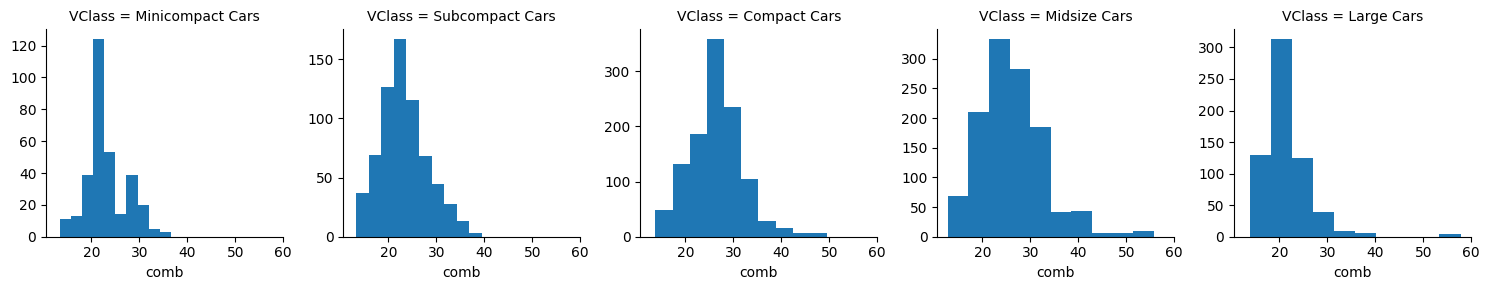

In [ ]:
sns.FacetGrid(data=fuel, col='VClass', sharey=False).map(plt.hist, 'comb');



#  We are back to line plots

The line plot is a fairly common plot type that is used to plot the trend of one numeric variable against values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram). If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

If the x-variable represents time, then a line plot of the data is frequently known as a time series plot. For example, we have only one observation per time period, like in stock or currency charts.

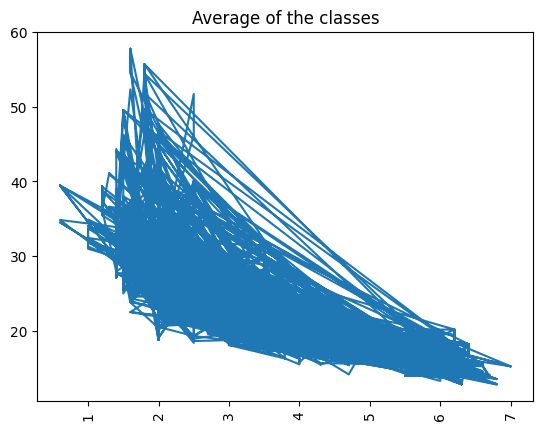

In [ ]:
plt.errorbar(data=fuel, x='displ', y='comb')
plt.xticks(rotation=90)
plt.title('Average of the classes');

In [ ]:
bin_edges=np.arange(0.6, 7+0.2, 0.2)
bin_centers=bin_edges[:-1]+0.1

disply_binned=pd.cut(fuel['displ'], bin_edges, include_lowest=True)
disply_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64, right]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] < ... <
                                            (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

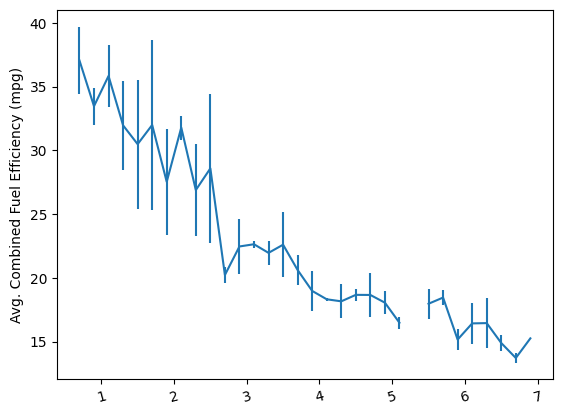

In [ ]:
comb_mean = fuel['comb'].groupby(disply_binned).mean()
comb_std = fuel['comb'].groupby(disply_binned).std()
## Plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');